In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [12]:
# convert 2 dimentional y_train array to one-dimentional
y_train=y_train.reshape(-1,)
y_train[:3]

array([6, 9, 9], dtype=uint8)

In [9]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [44]:
def plot_img(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

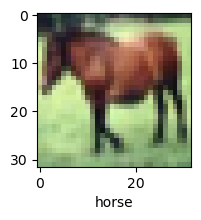

In [45]:
plot_img(X_train,y_train,7)

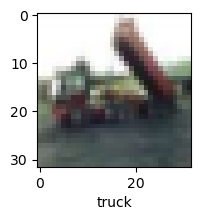

In [46]:
plot_img(X_train,y_train,2)

In [24]:
#Normalize data
X_train=X_train/255
X_test=X_test/255

##### Simple Nural Network

In [32]:
ANN=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
           
])
ANN.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ANN.fit(X_train,y_train,epochs=4)

Epoch 1/4
1563/1563 [==============================] - 34s 22ms/step - loss: 1.8136 - accuracy: 0.3529
Epoch 2/4
1563/1563 [==============================] - 34s 22ms/step - loss: 1.6225 - accuracy: 0.4282
Epoch 3/4
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5401 - accuracy: 0.4556
Epoch 4/4
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4817 - accuracy: 0.4794


In [33]:
ANN.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.5007 - accuracy: 0.4625


[1.500737190246582, 0.4625000059604645]

In [35]:
#Classification Report
from sklearn.metrics import confusion_matrix, classification_report
y_pred=ANN.predict(X_test)
y_pred[1]

313/313 [==============================] - 3s 11ms/step


array([0.77627176, 0.9352602 , 0.17044297, 0.24825373, 0.21897045,
       0.06570155, 0.04190169, 0.20357955, 0.9741332 , 0.99164945],
      dtype=float32)

In [36]:
y_pred_classes=[np.argmax(ele)for ele in y_pred]
print('Classification Report: \n',classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.47      0.53      1000
           1       0.69      0.35      0.47      1000
           2       0.47      0.23      0.31      1000
           3       0.37      0.28      0.32      1000
           4       0.45      0.38      0.41      1000
           5       0.38      0.38      0.38      1000
           6       0.51      0.58      0.54      1000
           7       0.48      0.57      0.52      1000
           8       0.63      0.57      0.60      1000
           9       0.34      0.81      0.48      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.46     10000
weighted avg       0.49      0.46      0.46     10000



##### Convolutional Neural Network

In [38]:
CNN=models.Sequential([
    #CNN
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

In [39]:
CNN.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

CNN.fit(X_train,y_train,epochs=4)

Epoch 1/4
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4980 - accuracy: 0.4623
Epoch 2/4
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1546 - accuracy: 0.5941
Epoch 3/4
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0388 - accuracy: 0.6364
Epoch 4/4
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9678 - accuracy: 0.6629


In [41]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9983 - accuracy: 0.6546


[0.9982720613479614, 0.6546000242233276]

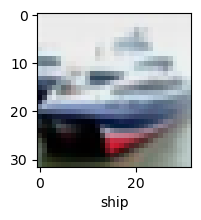

In [47]:
y_test=y_test.reshape(-1,)
plot_img(X_test,y_test,1)

In [50]:
y_pred=CNN.predict(X_test)
y_pred[:3]

313/313 [==============================] - 1s 3ms/step


array([[9.1671627e-03, 5.8100524e-04, 2.4518142e-02, 4.6761686e-01,
        8.6624864e-03, 8.2180150e-02, 1.9860914e-01, 2.1378393e-03,
        2.0590784e-01, 6.1938766e-04],
       [7.7415146e-02, 6.3091584e-02, 3.7894319e-05, 7.1990748e-06,
        2.7395094e-05, 3.1390916e-06, 1.3641068e-07, 1.6460727e-06,
        8.5018796e-01, 9.2279715e-03],
       [4.8411600e-02, 9.0444088e-02, 1.6215096e-03, 5.0449916e-03,
        8.0469443e-04, 2.5720722e-03, 5.0633098e-04, 7.1872579e-04,
        8.1524175e-01, 3.4634177e-02]], dtype=float32)

In [53]:
y_pred_class=[np.argmax(ele) for ele in y_pred]
y_pred_class[:5]

[3, 8, 8, 0, 4]

In [54]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [55]:
print('Classification Report: \n',classification_report(y_test,y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.66      0.68      1000
           1       0.85      0.67      0.75      1000
           2       0.52      0.58      0.55      1000
           3       0.51      0.46      0.48      1000
           4       0.60      0.59      0.60      1000
           5       0.57      0.54      0.56      1000
           6       0.74      0.72      0.73      1000
           7       0.75      0.69      0.71      1000
           8       0.65      0.84      0.73      1000
           9       0.68      0.80      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000

